In [1]:
import requests
from webdriver_manager.chrome import ChromeDriverManager as CDM
from bs4 import BeautifulSoup
import cv2
import urllib
import PIL
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import pytesseract
from selenium import webdriver
import easyocr

In [2]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

In [3]:
browser = webdriver.Chrome(CDM().install(),options=options)
browser.maximize_window()
browser.implicitly_wait(10)

[WDM] - 

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 94.0.4606
[WDM] - Get LATEST driver version for 94.0.4606
[WDM] - Driver [C:\Users\nvnsl\.wdm\drivers\chromedriver\win32\94.0.4606.61\chromedriver.exe] found in cache


In [4]:
try:
    browser.get("https://speedtest.net/")
    browser.switch_to.frame("google_ads_iframe_/6692/speedtest.net/stnext_leaderboard_0")
    x=browser.page_source
except Exception as e:
    print(e)
#print(x)

In [5]:
ad_number = 1

In [6]:
soup1=BeautifulSoup(x,'html.parser')
image=soup1.find_all('img')
#print(image)
#print('')
#print('Ad link:',image[0]['src'])
for i in image:
    print("URL: {}".format(i['src']))
#imglink=image[0]['src']

URL: https://tpc.googlesyndication.com/daca_images/simgad/4944116743675547557
URL: https://tpc.googlesyndication.com/pagead/images/abg/en.png
URL: https://tpc.googlesyndication.com/pagead/images/abg/icon.png
URL: //www.google.com/ads/measurement/l?ebcid=ALh7CaTi8E7Lj-Y6GHkMDcjaIlrOIfSu1y8Pvtat2sUsPE-iuSbtAKxXSUKTnf3cNz0eTnHL3WzGdVwmh6kTgnwnD998nMpoCA
URL: https://securepubads.g.doubleclick.net/pagead/adview?ai=CqOhedwFmYbjWKcG1yAPHu7KICPzeltBl0JzokPwM0IGK50cQASDOu-QfYOXS5oO8DqAB_9uKyAPIAQLgAgCoAwHIAwiqBOoBT9C98Oy9RtTsET9-LO5N4MdCzuB3qVYYNX3TjfdzZVCHqy8o4BIm1WKhwWEZ0r9oK6C4o3QXQK2OP6nFfl532dliW1M1MEUFtClBNpOFDE4NLRN7zThCEGimvoqG6RrBWAHb5e9gRzAaLFK4Ue28f6zB7tmE3OvHLZt3Bo5Vrno-mpdaEUMZFiGKw0Erwr91_1FjakyzOCFTxUw0bFw44R2ousbz2u_n_Os2MwTumLUaqapslcCmPwDpMRd1XuU0NgKUUQbe-RnsVAnHLALy6DhcBBccPkYtvb3CCWN2dsvhcOoyh-TMuS6XwASo-KDPvAPgBAGSBQQIBBgBkgUECAUYBKAGAoAHuf-togKoB_DZG6gH8tkbqAeOzhuoB5PYG6gHugaoB-6WsQKoB9XJG6gHpr4b2AcB8gcEEJugB9IIBwiIYRABGB2ACgPICwHYEwzQFQGAFwGyFx4KHAgAEhRwdWItMzEyMTU2MzQ0N

In [7]:
check = 0
img_list=[]

In [8]:
for i in image:
    try:
        urllib.request.urlretrieve(i['src'], 'speedtest_ad{}.png'.format(ad_number)) 
        img = PIL.Image.open("speedtest_ad{}.png".format(ad_number))
        check+=1
        img_list.append(img)
        ad_number+=1
    except Exception as e:
        print(e)
        continue
print(img_list) 

try:
    img.save('pdf.pdf', "PDF" ,resolution=100.0, save_all=True, append_images=img_list)
except Exception as e:
    print(e)

unknown url type: '//www.google.com/ads/measurement/l?ebcid=ALh7CaTi8E7Lj-Y6GHkMDcjaIlrOIfSu1y8Pvtat2sUsPE-iuSbtAKxXSUKTnf3cNz0eTnHL3WzGdVwmh6kTgnwnD998nMpoCA'
cannot identify image file 'speedtest_ad4.png'
[<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=728x90 at 0x293F9106388>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=192x30 at 0x293F911BCC8>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=15x15 at 0x293F911BDC8>]
cannot save mode RGBA


In [9]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [10]:
for j in range(1,check+1):
    try:
        data_eng = pytesseract.image_to_string(Image.open("speedtest_ad{}.png".format(j)), lang='eng')#process_image("sample.png", "eng")
        print(data_eng)
        file = open("text_of_ad{}.txt".format(j), "w+")
        file.write(data_eng)
        file.close()
        print("done")
    except Exception as e:
        print(e)
        continue

G Write With Grammarly Send every email with c
ed ct) c

 
 

done
Ads by Google @

done

done


In [11]:
reader = easyocr.Reader(['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


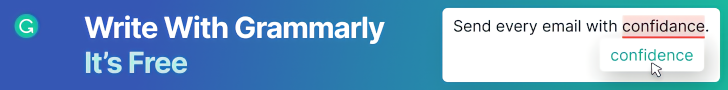

In [12]:
im = PIL.Image.open("speedtest_ad1.png")
im

In [13]:
bounds = reader.readtext('speedtest_ad1.png')
bounds

[([[83, 10], [391, 10], [391, 49], [83, 49]],
  'Write With Grammarly',
  0.9989872114320628),
 ([[451, 17], [706, 17], [706, 37], [451, 37]],
  'Send every email with confidance',
  0.9926961568708692),
 ([[609, 45], [697, 45], [697, 65], [609, 65]],
  'confidence',
  0.9999949108586859),
 ([[80, 48], [192, 48], [192, 80], [80, 80]], "It's Free", 0.9844256775472096)]

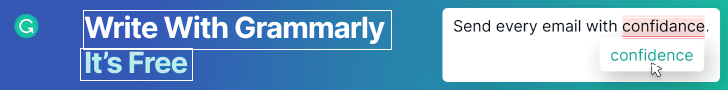

In [14]:
def draw_boxes(image, bounds, color='white', width=1):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], width=width)
    return image

draw_boxes(im, bounds)

In [15]:
import tensorflow as tf
import numpy as np
#import matplotlib.pyplot as plt
import os


<p>Referred https://github.com/ptnv-s/AdScrapper/blob/main/Ad_Scrapper.ipynb for logo detection</p>

In [16]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [17]:
%cd yolov5
%pip install setuptools --upgrade
%pip install -r requirements.txt

C:\Users\nvnsl\yolov5
Requirement already up-to-date: setuptools in d:\anaconda\lib\site-packages (58.2.0)
Note: you may need to restart the kernel to use updated packages.
  Using cached https://files.pythonhosted.org/packages/66/7a/9f3a49dea61e98ac8bd3b6b619da4fcb59053232a6e11e9e865dab7c16e0/PyYAML-5.4.1-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/92/96/144f70b972a9c0eabbd4391ef93ccd49d0f2747f4f6a2a2738e99e5adc65/requests-2.26.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a0/20/a59a30c32330e4ff704faa4273b251db042d495e0c367bcdf045c6fe26e9/tensorboard-2.6.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/10/5b/0479d7d845b5ba410ca702ffcd7f2cd95a14a4dfff1fde2637802b258b9b/seaborn-0.11.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/6c/8b/22ce44e1c71558161a8bd54471123cc796589c7ebbfc15a7e8932e522f83/thop-0.0.31.post2005241907-py3-none-any.whl
  Using cached https://files.py

ERROR: conda 4.10.3 requires ruamel_yaml_conda>=0.11.14, which is not installed.
ERROR: easyocr 1.4.1 has requirement Pillow<8.3.0, but you'll have pillow 8.3.2 which is incompatible.
ERROR: tensorflow 2.1.0 has requirement tensorboard<2.2.0,>=2.1.0, but you'll have tensorboard 2.6.0 which is incompatible.
ERROR: Cannot uninstall 'PyYAML'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [18]:
%%bash
wget http://image.ntua.gr/iva/datasets/flickr_logos/flickr_logos_27_dataset.tar.gz
tar zxvf flickr_logos_27_dataset.tar.gz
cd flickr_logos_27_dataset
tar zxvf flickr_logos_27_dataset_images.tar.gz

flickr_logos_27_dataset/
flickr_logos_27_dataset/flickr_logos_27_dataset_distractor_set_urls.txt
flickr_logos_27_dataset/flickr_logos_27_dataset_training_set_annotation.txt
flickr_logos_27_dataset/flickr_logos_27_dataset_query_set_annotation.txt
flickr_logos_27_dataset/flickr_logos_27_dataset_images.tar.gz
flickr_logos_27_dataset_images/
flickr_logos_27_dataset_images/2176584286.jpg
flickr_logos_27_dataset_images/3156402215.jpg
flickr_logos_27_dataset_images/3455836079.jpg
flickr_logos_27_dataset_images/4426526983.jpg
flickr_logos_27_dataset_images/2418409523.jpg
flickr_logos_27_dataset_images/2126991906.jpg
flickr_logos_27_dataset_images/13455389.jpg
flickr_logos_27_dataset_images/3209750863.jpg
flickr_logos_27_dataset_images/3334869821.jpg
flickr_logos_27_dataset_images/455131100.jpg
flickr_logos_27_dataset_images/3381786063.jpg
flickr_logos_27_dataset_images/3193687005.jpg
flickr_logos_27_dataset_images/2422219264.jpg
flickr_logos_27_dataset_images/339019736.jpg
flickr_logos_27_data

--2021-10-13 03:13:50--  http://image.ntua.gr/iva/datasets/flickr_logos/flickr_logos_27_dataset.tar.gz
Resolving image.ntua.gr (image.ntua.gr)... 147.102.11.1
Connecting to image.ntua.gr (image.ntua.gr)|147.102.11.1|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 101827904 (97M) [application/x-gzip]
Saving to: â€˜flickr_logos_27_dataset.tar.gz.2â€™

     0K .......... .......... .......... .......... ..........  0% 1.30M 75s
    50K .......... .......... .......... .......... ..........  0% 11.6M 41s
   100K .......... .......... .......... .......... ..........  0% 11.3M 30s
   150K .......... .......... .......... .......... ..........  0% 9.00M 26s
   200K .......... .......... .......... .......... ..........  0% 9.60M 22s
   250K .......... .......... .......... .......... ..........  0% 6.45M 21s
   300K .......... .......... .......... .......... ..........  0% 18.8M 19s
   350K .......... .......... .......... .......... ..........  0% 8.92M 18s
   400K

In [19]:
path = r"C:\Users\nvnsl\yolov5\data\Train"
isFile = os.path.isdir(path)
print(isFile)
if isFile is False:
  os.mkdir(path)

True


In [23]:
f = open(r'C:\\Users\\nvnsl/yolov5\\flickr_logos_27_dataset\\flickr_logos_27_dataset_training_set_annotation.txt')
lines = f.read().split('\n')[:-1]
f.close()
input_path = r'C:\\Users\\nvnsl/yolov5\\flickr_logos_27_dataset\\flickr_logos_27_dataset_images\\'
for line in lines:
  print_buffer = []
  print(line)
  chunks = line.split(' ')
  name = chunks[0]
  class_id = 0
  xmin = float(chunks[3])
  xmax = float(chunks[5])
  ymin = float(chunks[4])
  ymax = float(chunks[6])
  img_path = r'C:\\Users\\nvnsl/yolov5\\flickr_logos_27_dataset\\flickr_logos_27_dataset_images\\'+ str(name) 
  img=PIL.Image.open(img_path)
  w= int(img.size[0])
  h= int(img.size[1])
  b_center_x = (xmin + xmax) / 2 
  b_center_y = (ymin + ymax) / 2
  b_width    = (xmax - xmin)
  b_height   = (ymax - ymin)
  b_center_x /= w 
  b_center_y /= h 
  b_width    /= w 
  b_height   /= h
  print_buffer.append("{} {:.3f} {:.3f} {:.3f} {:.3f}".format(class_id, b_center_x, b_center_y, b_width, b_height))
  save_file_name = os.path.join(r'C:\\Users\\nvnsl\\yolov5\\data\\Train', name.replace("jpg", "txt"))
  print("\n".join(print_buffer), file= open(save_file_name, "w"))

144503924.jpg Adidas 1 38 12 234 142 
2451569770.jpg Adidas 1 242 208 413 331 
390321909.jpg Adidas 1 13 5 89 60 
4761260517.jpg Adidas 1 43 122 358 354 
4763210295.jpg Adidas 1 83 63 130 93 
4763210295.jpg Adidas 1 91 288 125 306 
4763210295.jpg Adidas 1 182 63 229 94 
4763210295.jpg Adidas 1 192 291 225 306 
4763210295.jpg Adidas 1 285 61 317 79 
4763210295.jpg Adidas 1 285 298 324 329 
4763210295.jpg Adidas 1 377 292 421 324 
4763210295.jpg Adidas 1 383 55 416 76 
1230939811.jpg Adidas 2 129 326 257 423 
1230939811.jpg Adidas 2 137 336 243 395 
2550056374.jpg Adidas 2 18 2 488 278 
3294282629.jpg Adidas 2 126 252 207 311 
3294282629.jpg Adidas 2 127 324 206 381 
3294282629.jpg Adidas 2 129 109 206 162 
3294282629.jpg Adidas 2 132 176 206 234 
3294282629.jpg Adidas 2 212 111 287 165 
3294282629.jpg Adidas 2 213 180 288 236 
3294282629.jpg Adidas 2 213 253 290 312 
3294282629.jpg Adidas 2 213 327 287 382 
3294282629.jpg Adidas 2 294 109 373 167 
3294282629.jpg Adidas 2 294 327 372 383

3006946827.jpg Apple 2 79 17 444 310 
3065654531.jpg Apple 2 84 134 252 366 
3190306185.jpg Apple 2 321 257 373 299 
3261774945.jpg Apple 2 64 20 397 231 
3733440395.jpg Apple 2 12 127 74 196 
3733440395.jpg Apple 2 41 62 143 162 
3733440395.jpg Apple 2 80 5 206 106 
3733440395.jpg Apple 2 186 155 227 200 
3733440395.jpg Apple 2 225 155 252 184 
3733440395.jpg Apple 2 227 248 262 278 
3733440395.jpg Apple 2 229 201 262 234 
3733440395.jpg Apple 2 247 227 270 254 
3733440395.jpg Apple 2 252 191 275 213 
3733440395.jpg Apple 2 253 301 280 323 
3733440395.jpg Apple 2 276 290 292 304 
3733440395.jpg Apple 2 283 269 302 284 
3733440395.jpg Apple 2 284 10 316 45 
3733440395.jpg Apple 2 287 307 314 325 
3733440395.jpg Apple 2 297 291 312 309 
3733440395.jpg Apple 2 304 277 321 292 
3733440395.jpg Apple 2 309 297 326 312 
3733440395.jpg Apple 2 325 240 346 264 
3733440395.jpg Apple 2 329 299 351 319 
3733440395.jpg Apple 2 334 65 361 99 
3733440395.jpg Apple 2 350 232 379 256 
3733440395.jpg A

3218275786.jpg BMW 5 92 2 304 298 
4559760305.jpg BMW 5 313 15 486 180 
255547402.jpg BMW 5 259 27 390 127 
3343182248.jpg BMW 5 69 11 429 356 
3369741917.jpg BMW 5 41 135 448 400 
3739623921.jpg BMW 5 43 4 438 398 
4253420625.jpg BMW 5 27 32 477 459 
2237130264.jpg BMW 5 67 54 446 447 
3333221097.jpg BMW 5 111 99 370 355 
3726202356.jpg BMW 5 135 124 321 299 
4329940418.jpg BMW 5 199 20 319 104 
4585454903.jpg BMW 5 174 136 306 257 
185712356.jpg BMW 5 63 78 456 373 
2070616132.jpg BMW 5 81 6 360 270 
3456463952.jpg BMW 5 42 39 315 469 
427128537.jpg BMW 5 143 70 363 258 
4698952282.jpg BMW 5 30 21 197 231 
2790511610.jpg BMW 6 123 71 354 277 
3625726534.jpg BMW 6 59 43 283 266 
3665300694.jpg BMW 6 183 126 342 216 
4435973547.jpg BMW 6 1 1 313 325 
4618294181.jpg BMW 6 167 81 424 290 
2789662807.jpg BMW 6 33 10 114 74 
2789664089.jpg BMW 6 74 122 226 243 
2789664089.jpg BMW 6 256 93 385 193 
3089967648.jpg BMW 6 156 180 366 357 
3621549337.jpg BMW 6 120 56 383 301 
4400566703.jpg BMW

18945268.jpg Cocacola 2 165 320 245 351 
18945268.jpg Cocacola 2 166 75 248 116 
18945268.jpg Cocacola 2 167 177 245 223 
18945268.jpg Cocacola 2 167 237 248 277 
18945268.jpg Cocacola 2 173 6 246 33 
18945268.jpg Cocacola 2 205 399 256 422 
18945268.jpg Cocacola 2 252 232 332 272 
18945268.jpg Cocacola 2 253 317 328 348 
18945268.jpg Cocacola 2 254 71 331 118 
18945268.jpg Cocacola 2 254 175 329 219 
18945268.jpg Cocacola 2 256 3 330 34 
18945268.jpg Cocacola 2 269 390 339 422 
18945268.jpg Cocacola 2 336 73 413 112 
18945268.jpg Cocacola 2 336 149 411 190 
18945268.jpg Cocacola 2 338 234 415 265 
18945268.jpg Cocacola 2 341 312 418 340 
18945268.jpg Cocacola 2 357 389 391 423 
18945268.jpg Cocacola 2 419 145 494 187 
18945268.jpg Cocacola 2 419 226 495 261 
18945268.jpg Cocacola 2 423 64 496 113 
18945268.jpg Cocacola 2 428 301 496 340 
233507685.jpg Cocacola 2 36 119 309 243 
2435021305.jpg Cocacola 2 30 112 352 270 
332913436.jpg Cocacola 2 84 194 174 236 
132888485.jpg Cocacola 2 

542894584.jpg Cocacola 6 231 248 278 278 
542894584.jpg Cocacola 6 232 131 280 160 
542894584.jpg Cocacola 6 235 193 282 217 
2435838064.jpg Cocacola 6 6 6 320 345 
2962045.jpg Cocacola 6 207 57 385 210 
4023480867.jpg Cocacola 6 19 232 345 405 
4162347545.jpg Cocacola 6 57 180 302 263 
4427242482.jpg Cocacola 6 6 84 305 206 
1354674694.jpg Cocacola 6 11 16 110 76 
18945268.jpg Cocacola 6 1 246 72 282 
18945268.jpg Cocacola 6 3 83 75 121 
18945268.jpg Cocacola 6 3 164 70 201 
18945268.jpg Cocacola 6 3 326 63 362 
18945268.jpg Cocacola 6 75 326 150 351 
18945268.jpg Cocacola 6 77 158 157 199 
18945268.jpg Cocacola 6 79 3 157 39 
18945268.jpg Cocacola 6 79 238 157 278 
18945268.jpg Cocacola 6 82 80 160 118 
18945268.jpg Cocacola 6 165 320 245 351 
18945268.jpg Cocacola 6 166 75 248 116 
18945268.jpg Cocacola 6 167 177 245 223 
18945268.jpg Cocacola 6 167 237 248 277 
18945268.jpg Cocacola 6 173 6 246 33 
18945268.jpg Cocacola 6 205 399 256 422 
18945268.jpg Cocacola 6 252 232 332 272 
18

2587818591.jpg Fedex 6 140 133 206 191 
2587818591.jpg Fedex 6 239 203 260 221 
339019736.jpg Fedex 6 279 276 307 293 
362855616.jpg Fedex 6 115 206 306 274 
4737345823.jpg Fedex 6 26 52 458 213 
4749623965.jpg Fedex 6 32 85 469 236 
2350426312.jpg Fedex 6 3 6 427 342 
2680574577.jpg Fedex 6 1 12 495 293 
3428192889.jpg Fedex 6 19 19 182 74 
4347515520.jpg Fedex 6 1 3 213 69 
4641707954.jpg Fedex 6 80 20 329 98 
3103582592.jpg Fedex 6 95 124 180 161 
3103582592.jpg Fedex 6 359 92 403 118 
3325271357.jpg Fedex 6 18 67 475 215 
362712915.jpg Fedex 6 84 62 476 213 
3777915073.jpg Fedex 6 39 151 109 224 
3777915073.jpg Fedex 6 296 234 385 265 
4006894378.jpg Fedex 6 20 52 243 155 
159166594.jpg Fedex 6 204 101 333 162 
2348900650.jpg Fedex 6 4 27 496 302 
3088544942.jpg Fedex 6 54 128 289 210 
3667849273.jpg Fedex 6 11 25 321 120 
4150061002.jpg Fedex 6 6 5 322 117 
1224628248.jpg Ferrari 1 140 36 414 327 
3206116179.jpg Ferrari 1 144 41 365 311 
3300554626.jpg Ferrari 1 106 9 385 328 
357

2938026725.jpg Ford 6 174 158 283 220 
3514397412.jpg Ford 6 8 7 496 303 
4253115679.jpg Ford 6 33 169 459 333 
4422086623.jpg Ford 6 61 60 440 215 
2228221904.jpg Ford 6 52 83 410 232 
2485974348.jpg Ford 6 13 107 491 285 
3324939734.jpg Ford 6 1 26 147 113 
3324939734.jpg Ford 6 3 123 144 220 
3324939734.jpg Ford 6 133 107 319 263 
3324939734.jpg Ford 6 149 30 304 120 
3324939734.jpg Ford 6 301 165 498 249 
3324939734.jpg Ford 6 307 100 498 167 
4218732095.jpg Ford 6 113 142 484 278 
4280085481.jpg Ford 6 217 153 278 182 
165691999.jpg Ford 6 137 67 417 277 
224886291.jpg Ford 6 35 103 463 267 
2938879364.jpg Ford 6 82 127 392 264 
3321350768.jpg Ford 6 26 75 481 268 
4219499614.jpg Ford 6 44 125 407 285 
2766150734.jpg Google 1 77 28 367 121 
310688144.jpg Google 1 2 3 273 105 
4582547214.jpg Google 1 11 4 473 173 
4583055527.jpg Google 1 135 64 388 153 
4583055527.jpg Google 1 138 173 271 224 
50302921.jpg Google 1 5 3 146 47 
2132909220.jpg Google 2 4 6 199 77 
2774437111.jpg Goog

3244264597.jpg Heineken 6 83 51 417 311 
3786492252.jpg Heineken 6 5 5 88 113 
4261671591.jpg Heineken 6 264 26 341 102 
3051999324.jpg Heineken 6 246 127 321 226 
3051999324.jpg Heineken 6 254 20 337 124 
3051999324.jpg Heineken 6 321 125 409 231 
3051999324.jpg Heineken 6 339 14 411 121 
3520033212.jpg Heineken 6 20 17 316 143 
3785668123.jpg Heineken 6 321 293 460 430 
3831371619.jpg Heineken 6 92 124 176 232 
3831371619.jpg Heineken 6 238 123 324 229 
3831371619.jpg Heineken 6 321 124 405 241 
3960429630.jpg Heineken 6 249 134 305 217 
3960429630.jpg Heineken 6 305 126 376 212 
2256858637.jpg HP 1 177 105 304 190 
3204050952.jpg HP 1 118 105 365 275 
3496048941.jpg HP 1 415 195 458 239 
3734548574.jpg HP 1 355 233 380 250 
4453898896.jpg HP 1 20 45 84 89 
1263617360.jpg HP 2 3 5 69 56 
2675240640.jpg HP 2 241 168 269 191 
3283915433.jpg HP 2 132 155 370 346 
3496862594.jpg HP 2 424 212 476 257 
3734516894.jpg HP 2 200 246 276 293 
2256858637.jpg HP 2 177 105 304 190 
3204050952.jpg

3091292844.jpg McDonalds 3 165 270 260 349 
3261970877.jpg McDonalds 3 4 26 301 302 
3473801010.jpg McDonalds 3 106 87 394 318 
3497593254.jpg McDonalds 3 162 156 218 226 
162002009.jpg McDonalds 4 118 110 296 271 
239985057.jpg McDonalds 4 2 150 105 242 
2677577557.jpg McDonalds 4 176 95 340 218 
3729765088.jpg McDonalds 4 402 183 446 221 
3858957735.jpg McDonalds 4 202 85 327 185 
2616906744.jpg McDonalds 4 380 26 399 48 
2887641700.jpg McDonalds 4 72 266 95 291 
2887641700.jpg McDonalds 4 205 217 240 253 
3230189747.jpg McDonalds 4 28 20 334 272 
3230189747.jpg McDonalds 4 58 54 252 229 
3274818430.jpg McDonalds 4 201 42 277 103 
4006128651.jpg McDonalds 4 8 4 226 187 
142479250.jpg McDonalds 4 269 45 306 77 
2073826793.jpg McDonalds 4 151 11 392 206 
3835918737.jpg McDonalds 4 167 12 343 150 
3933416555.jpg McDonalds 4 201 104 260 155 
4757315595.jpg McDonalds 4 71 205 147 271 
4757315595.jpg McDonalds 4 228 153 265 185 
2913811697.jpg McDonalds 4 357 250 375 267 
3091292844.jpg Mc

2656155309.jpg Nbc 6 0 0 116 116 
3570522135.jpg Nbc 6 103 60 408 243 
4191547874.jpg Nbc 6 248 7 344 69 
1359885883.jpg Nbc 6 111 32 448 271 
208158931.jpg Nbc 6 10 17 487 317 
3571331128.jpg Nbc 6 86 13 404 299 
3667849173.jpg Nbc 6 0 0 200 200 
4205812739.jpg Nbc 6 39 39 476 227 
2530090035.jpg Nbc 6 0 0 270 269 
2716412211.jpg Nbc 6 68 7 295 183 
4379408143.jpg Nbc 6 299 381 452 478 
4702500410.jpg Nbc 6 6 14 496 342 
557839607.jpg Nbc 6 132 96 214 188 
2518709496.jpg Nbc 6 3 42 380 334 
2794725337.jpg Nbc 6 153 29 286 122 
444595750.jpg Nbc 6 135 30 371 276 
4701866293.jpg Nbc 6 260 135 471 304 
4724828428.jpg Nbc 6 336 149 403 231 
2452451692.jpg Nbc 6 0 0 432 432 
3116688672.jpg Nbc 6 0 0 115 115 
3728967967.jpg Nbc 6 147 106 385 291 
844909343.jpg Nbc 6 2 27 496 358 
882748860.jpg Nbc 6 123 23 356 249 
2531530868.jpg Nike 1 37 139 360 285 
2855164257.jpg Nike 1 5 142 386 303 
2891341625.jpg Nike 1 39 71 355 210 
4316555119.jpg Nike 1 125 98 437 206 
605288903.jpg Nike 1 395 103

3202360116.jpg Pepsi 3 176 23 233 94 
3213763363.jpg Pepsi 3 95 78 276 233 
3218467456.jpg Pepsi 3 102 30 234 162 
3237339381.jpg Pepsi 3 49 56 153 139 
3237339381.jpg Pepsi 3 94 188 175 262 
3237339381.jpg Pepsi 3 100 295 168 362 
3237339381.jpg Pepsi 3 100 440 154 484 
3237339381.jpg Pepsi 3 234 449 284 485 
3237339381.jpg Pepsi 3 235 196 313 269 
3237339381.jpg Pepsi 3 239 309 300 372 
3237339381.jpg Pepsi 3 248 45 326 146 
2960027434.jpg Pepsi 3 11 7 128 130 
2960027434.jpg Pepsi 3 129 5 263 130 
3117510822.jpg Pepsi 3 2 339 38 368 
3117510822.jpg Pepsi 3 6 16 71 92 
3117510822.jpg Pepsi 3 11 111 75 176 
3117510822.jpg Pepsi 3 16 195 88 256 
3117510822.jpg Pepsi 3 23 262 92 328 
3117510822.jpg Pepsi 3 78 345 121 370 
3117510822.jpg Pepsi 3 174 348 206 374 
3117510822.jpg Pepsi 3 257 353 285 370 
3117510822.jpg Pepsi 3 288 282 356 334 
3117510822.jpg Pepsi 3 340 349 373 372 
3117510822.jpg Pepsi 3 342 198 410 267 
3117510822.jpg Pepsi 3 346 17 425 90 
3117510822.jpg Pepsi 3 351 108 

4077900663.jpg Porsche 2 95 161 260 381 
4507852944.jpg Porsche 2 95 3 212 118 
452091543.jpg Porsche 2 90 94 170 176 
4598657721.jpg Porsche 2 56 45 408 339 
538649986.jpg Porsche 2 66 168 317 365 
2795207851.jpg Porsche 2 117 164 281 359 
3301525494.jpg Porsche 2 90 30 428 362 
4315831502.jpg Porsche 2 52 149 274 397 
4472726837.jpg Porsche 2 70 46 437 368 
4491308340.jpg Porsche 2 97 3 203 117 
1402065041.jpg Porsche 3 205 182 330 292 
1690276845.jpg Porsche 3 181 113 323 271 
4213412628.jpg Porsche 3 170 166 312 337 
4506432358.jpg Porsche 3 102 2 200 116 
4537970631.jpg Porsche 3 91 18 205 156 
4077900663.jpg Porsche 3 95 161 260 381 
4507852944.jpg Porsche 3 95 3 212 118 
452091543.jpg Porsche 3 90 94 170 176 
4598657721.jpg Porsche 3 56 45 408 339 
538649986.jpg Porsche 3 66 168 317 365 
2795207851.jpg Porsche 3 117 164 281 359 
3301525494.jpg Porsche 3 90 30 428 362 
4315831502.jpg Porsche 3 52 149 274 397 
4472726837.jpg Porsche 3 70 46 437 368 
4491308340.jpg Porsche 3 97 3 2

4559666515.jpg RedBull 3 352 176 439 225 
1358914296.jpg RedBull 4 191 153 401 253 
3618901730.jpg RedBull 4 8 83 490 258 
3951357997.jpg RedBull 4 21 2 491 180 
4152834821.jpg RedBull 4 4 1 241 131 
4225050520.jpg RedBull 4 5 20 492 258 
2073319900.jpg RedBull 4 119 103 225 192 
3101502490.jpg RedBull 4 2 2 330 202 
3223329020.jpg RedBull 4 21 28 211 102 
3223329020.jpg RedBull 4 271 30 458 104 
3373561589.jpg RedBull 4 50 13 339 129 
3373561589.jpg RedBull 4 248 254 274 268 
3585256422.jpg RedBull 4 411 127 458 158 
1508285598.jpg RedBull 4 216 148 308 197 
2463686290.jpg RedBull 4 46 103 171 204 
2463686290.jpg RedBull 4 88 91 167 153 
2662264721.jpg RedBull 4 3 197 3 197 
4429895221.jpg RedBull 4 4 2 195 65 
4707086638.jpg RedBull 4 270 236 350 286 
310764290.jpg RedBull 4 5 9 493 320 
310764290.jpg RedBull 4 9 80 490 248 
3580857943.jpg RedBull 4 96 151 243 262 
3580857943.jpg RedBull 4 349 159 409 196 
4109425486.jpg RedBull 4 48 222 440 353 
4525736729.jpg RedBull 4 43 202 151 2

3539566827.jpg Sprite 5 315 149 343 177 
3539566827.jpg Sprite 5 353 147 383 175 
3539566827.jpg Sprite 5 353 194 381 222 
3539566827.jpg Sprite 5 356 241 383 270 
3539566827.jpg Sprite 5 360 48 388 76 
3539566827.jpg Sprite 5 360 97 390 129 
3539566827.jpg Sprite 5 389 232 418 259 
3539566827.jpg Sprite 5 390 187 420 217 
3539566827.jpg Sprite 5 394 99 421 124 
3539566827.jpg Sprite 5 401 55 423 79 
3539566827.jpg Sprite 5 409 144 419 174 
4330810490.jpg Sprite 5 134 209 201 265 
4330810490.jpg Sprite 5 250 230 329 292 
4750267378.jpg Sprite 5 36 56 341 250 
2725852441.jpg Sprite 6 182 350 238 394 
2900584649.jpg Sprite 6 325 159 410 221 
3491655774.jpg Sprite 6 0 0 500 495 
4369857005.jpg Sprite 6 1 211 115 402 
4387407495.jpg Sprite 6 23 105 319 268 
4387407495.jpg Sprite 6 339 78 429 197 
3342270648.jpg Sprite 6 32 58 167 150 
42948260.jpg Sprite 6 10 6 184 181 
2801899525.jpg Sprite 6 66 156 245 303 
3544071352.jpg Sprite 6 92 205 188 280 
4213622833.jpg Sprite 6 255 341 279 371 


3907307172.jpg Texaco 3 121 62 393 314 
4223850527.jpg Texaco 3 67 17 447 325 
4290942909.jpg Texaco 3 415 2 480 70 
1111800334.jpg Texaco 4 380 53 426 114 
3039312526.jpg Texaco 4 172 101 285 204 
3484102206.jpg Texaco 4 112 114 384 354 
3761584256.jpg Texaco 4 86 149 283 339 
3818214962.jpg Texaco 4 150 77 357 262 
2175812747.jpg Texaco 4 86 114 275 260 
3152384527.jpg Texaco 4 59 314 75 343 
3152384527.jpg Texaco 4 68 11 126 72 
3907306684.jpg Texaco 4 112 53 395 305 
4319198593.jpg Texaco 4 64 39 380 277 
4367483371.jpg Texaco 4 44 11 441 392 
2175802759.jpg Texaco 4 122 50 367 320 
2176584286.jpg Texaco 4 95 67 378 359 
2515731280.jpg Texaco 4 103 94 395 391 
3906521939.jpg Texaco 4 84 112 263 254 
3906524725.jpg Texaco 4 177 228 295 339 
2920077270.jpg Texaco 4 312 129 340 162 
3907298910.jpg Texaco 4 160 148 261 250 
3907307172.jpg Texaco 4 121 62 393 314 
4223850527.jpg Texaco 4 67 17 447 325 
4290942909.jpg Texaco 4 415 2 480 70 
2926640633.jpg Texaco 5 280 276 343 342 
334995

4371354206.jpg Unicef 6 346 168 412 201 
4771691508.jpg Unicef 6 316 198 340 228 
4771691508.jpg Unicef 6 332 308 424 329 
4771691508.jpg Unicef 6 428 194 492 219 
3947084971.jpg Unicef 6 8 4 480 117 
4284675151.jpg Unicef 6 270 119 347 156 
4310191138.jpg Unicef 6 150 189 219 215 
4310191138.jpg Unicef 6 376 171 422 191 
4346142355.jpg Unicef 6 21 94 75 129 
4346142355.jpg Unicef 6 250 18 292 44 
4771735876.jpg Unicef 6 40 113 123 143 
4771735876.jpg Unicef 6 285 114 429 150 
2423654138.jpg Vodafone 1 47 19 265 181 
2656406197.jpg Vodafone 1 41 299 62 322 
2656406197.jpg Vodafone 1 111 9 185 80 
3119389772.jpg Vodafone 1 52 3 80 24 
3817452506.jpg Vodafone 1 36 4 113 72 
4185986382.jpg Vodafone 1 1 91 226 364 
258770610.jpg Vodafone 2 17 22 255 195 
258770610.jpg Vodafone 2 76 33 201 126 
3231989873.jpg Vodafone 2 31 52 205 196 
332368134.jpg Vodafone 2 279 217 496 369 
332368134.jpg Vodafone 2 297 229 493 368 
332368134.jpg Vodafone 2 298 226 494 360 
332368134.jpg Vodafone 2 308 223

3002734592.jpg Yahoo 3 75 5 322 63 
3107573789.jpg Yahoo 3 2 134 247 190 
3950663671.jpg Yahoo 3 175 24 240 41 
4682534504.jpg Yahoo 3 125 16 177 27 
3797114221.jpg Yahoo 3 1 6 217 58 
3905787011.jpg Yahoo 3 6 3 183 44 
3972897298.jpg Yahoo 3 117 10 179 27 
4120098544.jpg Yahoo 3 4 83 492 248 
50471578.jpg Yahoo 3 1 2 221 39 
2126991906.jpg Yahoo 3 15 6 253 54 
217288720.jpg Yahoo 3 136 161 304 222 
2472817996.jpg Yahoo 3 2 4 499 106 
2514220918.jpg Yahoo 3 1 69 342 157 
386891249.jpg Yahoo 3 156 10 310 49 
2263927086.jpg Yahoo 4 82 212 301 280 
2792685284.jpg Yahoo 4 104 6 345 60 
3854044541.jpg Yahoo 4 203 189 327 264 
3854044541.jpg Yahoo 4 270 196 322 213 
386891274.jpg Yahoo 4 151 10 308 45 
390297596.jpg Yahoo 4 5 7 227 59 
2727066466.jpg Yahoo 4 2 75 345 184 
3002734592.jpg Yahoo 4 75 5 322 63 
3107573789.jpg Yahoo 4 2 134 247 190 
3950663671.jpg Yahoo 4 175 24 240 41 
4682534504.jpg Yahoo 4 125 16 177 27 
3797114221.jpg Yahoo 4 1 6 217 58 
3905787011.jpg Yahoo 4 6 3 183 44 
397

In [24]:
annotations = [os.path.join(r'C:/Users/nvnsl/yolov5/data/Train', x) for x in os.listdir(r'C:/Users/nvnsl/yolov5/data/Train') if x[-3:] == "txt"]

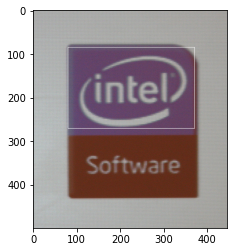

In [25]:
import random
random.seed(6)



def plot_bounding_box(image, annotation_list):
    annotations = np.array(annotation_list)
    w, h = image.size
    
    plotted_image = ImageDraw.Draw(image)
    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h 
    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]
    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0,y0), (x1,y1)))
        
    
    plt.imshow(np.array(image))
    plt.show()

# Get any random annotation file 
annotation_file = random.choice(annotations)
file = open(annotation_file)
annotation_list = file.read().split("\n")[:-1]
annotation_list = [x.split(" ") for x in annotation_list]
annotation_list = [[float(y) for y in x ] for x in annotation_list]

#Get the corresponding image file
image_file = annotation_file.replace("data/Train", "flickr_logos_27_dataset/flickr_logos_27_dataset_images").replace("txt", "jpg")
assert os.path.exists(image_file)

#Load the image
image = PIL.Image.open(image_file)
#Plot the Bounding Box
plot_bounding_box(image, annotation_list)

In [26]:
from PIL import Image

In [28]:
path = r"C:/Users/nvnsl/yolov5/data/Train_Image"
isFile = os.path.isdir(path)
print(isFile)
if isFile is False:
  os.mkdir(path)

True


In [29]:

for i in annotations:
  image_file = i.replace("data/Train", "flickr_logos_27_dataset/flickr_logos_27_dataset_images").replace("txt", "jpg")
  assert os.path.exists(image_file)
  image = Image.open(image_file)
  im2 = image.copy()
  counter = i.replace("data/Train", "data/Train_Image").replace("txt", "jpg")
  im2.save(counter)

In [30]:
annotations = [os.path.join(r'C:/Users/nvnsl/yolov5/data/Train', x) for x in os.listdir(r'C:/Users/nvnsl/yolov5/data/Train') if x[-3:] == "txt"]
annotations.sort()
images_tv = [os.path.join(r'C:/Users/nvnsl/yolov5/data/Train_Image', x) for x in os.listdir(r'C:/Users/nvnsl/yolov5/data/Train_Image') if x[-3:] == "jpg"]
images_tv.sort()

In [31]:

from sklearn.model_selection import train_test_split
train_images, val_images, train_annotations, val_annotations = train_test_split(images_tv, annotations, test_size = 0.2, random_state = 1)

In [33]:
path = r"C:/Users/nvnsl/yolov5/data/images/train/"
isFile = os.path.isdir(path)
print(isFile)
if isFile is False:
  os.mkdir(path)
path = r"C:/Users/nvnsl/yolov5/data/images/val/"
isFile = os.path.isdir(path)
print(isFile)
if isFile is False:
  os.mkdir(path)

True
True


In [36]:

from PIL import Image
path = r"C:/Users/nvnsl/yolov5/data/labels/"
isFile = os.path.isdir(path)
print(isFile)
if isFile is False:
  os.mkdir(path)
path = r"C:/Users/nvnsl/yolov5/data/labels/train/"
isFile = os.path.isdir(path)
print(isFile)
if isFile is False:
  os.mkdir(path)
path = r"C:/Users/nvnsl/yolov5/data/labels/val/"
isFile = os.path.isdir(path)
print(isFile)
if isFile is False:
  os.mkdir(path)

True
True
True


In [41]:
import shutil
from shutil import copyfile

def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        try:
            shutil.move(f, destination_folder)
        except:
            print(f)
            assert False

# Move the splits into their folders
move_files_to_folder(train_images, r'C:\\Users\\nvnsl\\yolov5\\data\\images\\train\\')
move_files_to_folder(val_images, r'C:\\Users\\nvnsl\\yolov5\\data\\images\\val\\')
move_files_to_folder(train_annotations, r'C:\\Users\\nvnsl\\yolov5\\data\\labels\\train\\')
move_files_to_folder(val_annotations, r'C:\\Users\\nvnsl\\yolov5\\data\\labels\\val\\')

C:/Users/nvnsl/yolov5/data/Train_Image\3732387125.jpg


AssertionError: 